In [1]:
import pandas as pd
from sklearnex import patch_sklearn 
patch_sklearn()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from datetime import datetime
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from collections import Counter 
from sklearn.metrics import confusion_matrix, fbeta_score, classification_report
from sklearn.ensemble import VotingClassifier

input_file = "E:/OVGU/Semester 3/DBSE Project/archive/fraudTrain.csv"
input_file1 = "E:/OVGU/Semester 3/DBSE Project/archive/fraudTest.csv"
train_csv = pd.read_csv(input_file, parse_dates=['trans_date_trans_time'])
test_csv = pd.read_csv(input_file1, parse_dates = ['trans_date_trans_time'])

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
train_csv.head(5)
test_csv.head(5)
#df.columns
#df.loc[df.is_fraud == 0,'merchant'].value_counts()
#df.merchant.unique()
#df.category.unique()
#df.city_pop.unique()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
#Data Cleaning - Checking for missing values and duplicate values

train_csv=train_csv.replace('',np.nan)
test_csv = test_csv.replace('', np.nan)
train_csv.isnull().sum(), test_csv.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

In [4]:
train_csv.info(), test_csv.info()
#df.loc[df.is_fraud == 1,'category'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

(None, None)

In [5]:
train_csv.duplicated().any(), test_csv.duplicated().any()

(False, False)

In [6]:
#Feature Extraction - Hour, HourEnc, 1D,7D,30D, Age, TimeDiff, age
train_csv['hour'] = train_csv.trans_date_trans_time.dt.hour
train_csv['hourEnc'] = 0
train_csv.loc[train_csv.hour < 5,'hourEnc'] = 1
train_csv.loc[train_csv.hour > 21,'hourEnc'] = 1

test_csv['hour'] = test_csv.trans_date_trans_time.dt.hour
test_csv['hourEnc'] = 0
test_csv.loc[test_csv.hour < 5,'hourEnc'] = 1
test_csv.loc[test_csv.hour > 21,'hourEnc'] = 1

In [7]:
def last1DayTransactionCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_1_day').sort_index()
    count_1_day = temp.rolling('1d').count() - 1
    count_1_day.index = temp.values
    x['count_1_day'] = count_1_day.reindex(x.index)
    return x
def last7DaysTransactionCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_7_days').sort_index()
    count_7_days = temp.rolling('7d').count() - 1
    count_7_days.index = temp.values
    x['count_7_days'] = count_7_days.reindex(x.index)
    return x
def last30DaysTransactionCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_30_days').sort_index()
    count_30_days = temp.rolling('30d').count() - 1
    count_30_days.index = temp.values
    x['count_30_days'] = count_30_days.reindex(x.index)
    return x
train_csv1 = train_csv.groupby('cc_num', group_keys=False).apply(last1DayTransactionCount)
train_csv1 = train_csv1.groupby('cc_num', group_keys=False).apply(last7DaysTransactionCount)
train_csv1 = train_csv1.groupby('cc_num', group_keys=False).apply(last30DaysTransactionCount)

test_csv1 = test_csv.groupby('cc_num', group_keys=False).apply(last1DayTransactionCount)
test_csv1 = test_csv1.groupby('cc_num', group_keys=False).apply(last7DaysTransactionCount)
test_csv1 = test_csv1.groupby('cc_num', group_keys=False).apply(last30DaysTransactionCount)

In [8]:
def timeDifference(x):
    x['time_diff'] = x.trans_date_trans_time - x.trans_date_trans_time.shift()
    return x
train_csv1 = train_csv1.groupby('cc_num', group_keys=False).apply(timeDifference)
train_csv1['time_diff'] = train_csv1['time_diff'].dt.seconds
train_csv1=train_csv1.fillna(0)

test_csv1 = test_csv1.groupby('cc_num', group_keys=False).apply(timeDifference)
test_csv1['time_diff'] = test_csv1['time_diff'].dt.seconds
test_csv1=test_csv1.fillna(0)
train_csv1['time_diff'], test_csv1['time_diff']

(0              0.0
 1              0.0
 2              0.0
 3              0.0
 4              0.0
             ...   
 1296670    16781.0
 1296671     7962.0
 1296672    29074.0
 1296673     4618.0
 1296674    44250.0
 Name: time_diff, Length: 1296675, dtype: float64,
 0             0.0
 1             0.0
 2             0.0
 3             0.0
 4             0.0
            ...   
 555714    16630.0
 555715     9743.0
 555716      724.0
 555717    12025.0
 555718     7136.0
 Name: time_diff, Length: 555719, dtype: float64)

In [9]:
train_csv1['dob'] = pd.to_datetime(train_csv1['dob'])
current_date = datetime.now()
train_csv1['age'] = (current_date - train_csv1['dob']).astype('<m8[Y]')

test_csv1['dob'] = pd.to_datetime(test_csv1['dob'])
current_date = datetime.now()
test_csv1['age'] = (current_date - test_csv1['dob']).astype('<m8[Y]')

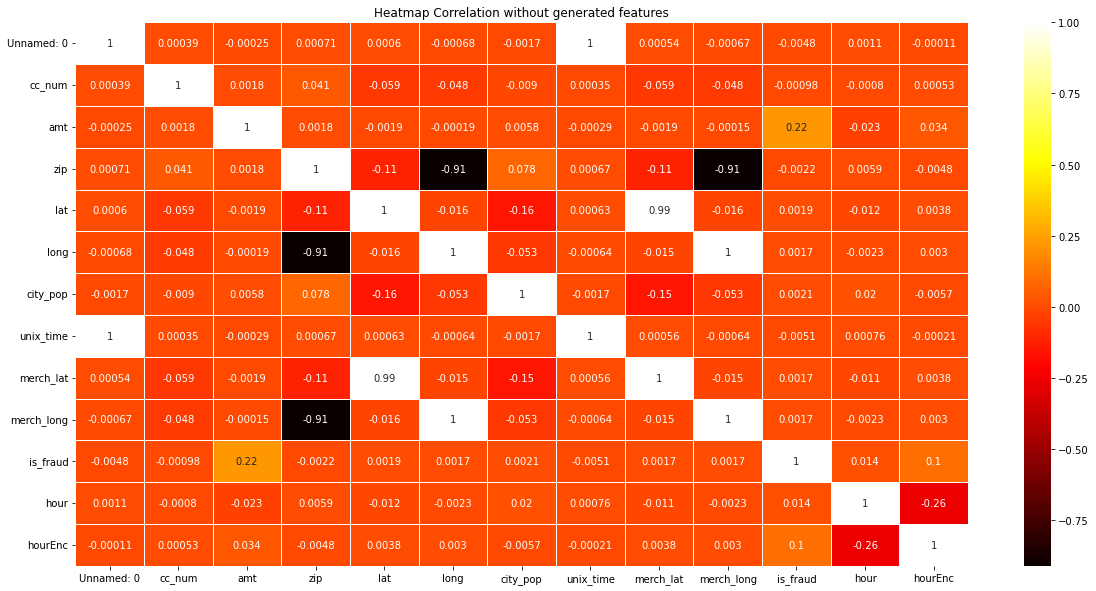

In [10]:
#Feature Selection using Correlation Heatmap

corr_matrix = train_csv.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="hot", linewidths=0.5)
plt.title('Heatmap Correlation without generated features')
plt.show()

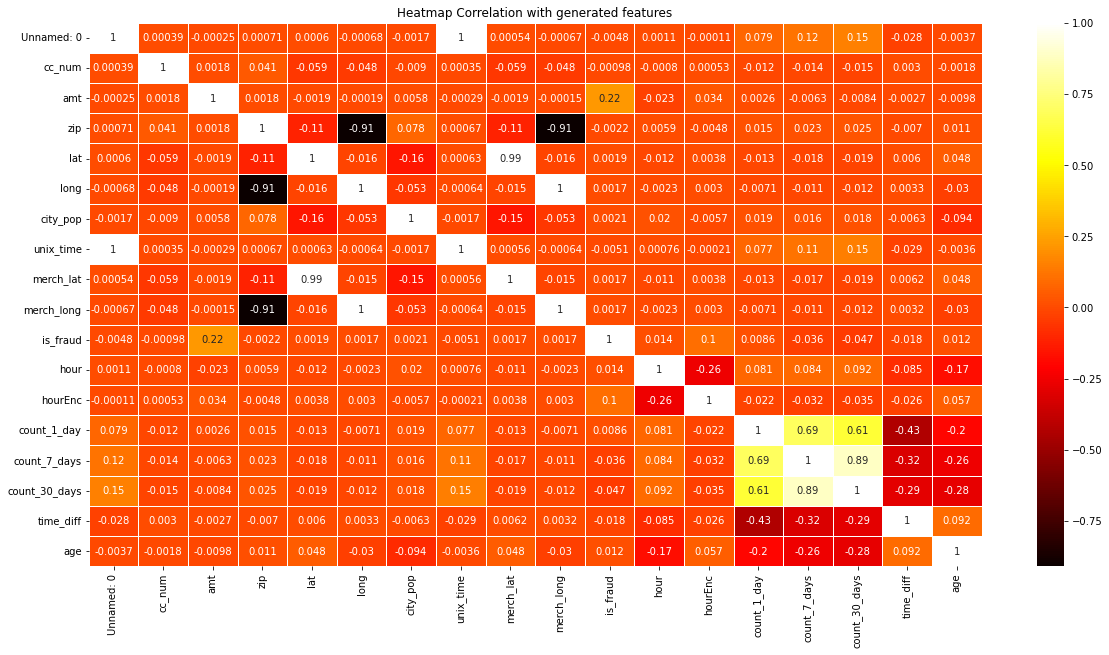

In [11]:
corr_matrix = train_csv1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='hot', linewidths=0.5)
plt.title('Heatmap Correlation with generated features')
plt.show()

In [12]:
train_csv1.corr()['is_fraud'].abs().sort_values(ascending=False)

is_fraud         1.000000
amt              0.219404
hourEnc          0.101077
count_30_days    0.046523
count_7_days     0.036301
time_diff        0.017529
hour             0.013799
age              0.012453
count_1_day      0.008638
unix_time        0.005078
Unnamed: 0       0.004767
zip              0.002162
city_pop         0.002136
lat              0.001894
merch_lat        0.001741
merch_long       0.001721
long             0.001721
cc_num           0.000981
Name: is_fraud, dtype: float64

In [13]:
#Feature Encoding - Categorical to Numerical (LabelEncoder)

cols = ['gender', 'category']
enc = LabelEncoder()
for col in cols:
    train_csv1[col] = enc.fit_transform(train_csv1[col])
    test_csv1[col] = enc.fit_transform(test_csv1[col])
#dropping irrelevant features
train_csv1= train_csv1.drop(['Unnamed: 0', 'trans_date_trans_time','cc_num','merchant', 'first', 'last', 'street','city','state','job','dob','trans_num','unix_time', 'merch_lat','merch_long'], axis = 1)
test_csv1= test_csv1.drop(['Unnamed: 0', 'trans_date_trans_time','cc_num','merchant', 'first', 'last', 'street','city','state','job','dob','trans_num','unix_time', 'merch_lat','merch_long'], axis = 1)

In [14]:
train_csv1.head(5), test_csv1.head(5)

(   category     amt  gender    zip      lat      long  city_pop  is_fraud  \
 0         8    4.97       0  28654  36.0788  -81.1781      3495         0   
 1         4  107.23       0  99160  48.8878 -118.2105       149         0   
 2         0  220.11       1  83252  42.1808 -112.2620      4154         0   
 3         2   45.00       1  59632  46.2306 -112.1138      1939         0   
 4         9   41.96       1  24433  38.4207  -79.4629        99         0   
 
    hour  hourEnc  count_1_day  count_7_days  count_30_days  time_diff   age  
 0     0        1          0.0           0.0            0.0        0.0  35.0  
 1     0        1          0.0           0.0            0.0        0.0  45.0  
 2     0        1          0.0           0.0            0.0        0.0  61.0  
 3     0        1          0.0           0.0            0.0        0.0  56.0  
 4     0        1          0.0           0.0            0.0        0.0  37.0  ,
    category    amt  gender    zip      lat      long  

In [15]:
#splitting features and target variable
x_train = train_csv1.drop(['is_fraud'], axis = 1)
y_train = train_csv1['is_fraud']

x_test = test_csv1.drop(['is_fraud'], axis = 1)
y_test = test_csv1['is_fraud']
#train_csv1.value_counts() #counting number of fraud(1) and normal (0) transactions

In [16]:
x_train = x_train[y_train==0] #train with only majority class(considering only class '0')

In [17]:
#Train Test Split (80% Training)

"""X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")
print(f"The testing dataset has {sorted(Counter(y_test).items())[0][1]} records for the majority class and {sorted(Counter(y_test).items())[1][1]} records for the minority class.")"""

'X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\nprint(\'The number of records in the training dataset is\', X_train.shape[0])\nprint(\'The number of records in the test dataset is\', X_test.shape[0])\nprint(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")\nprint(f"The testing dataset has {sorted(Counter(y_test).items())[0][1]} records for the majority class and {sorted(Counter(y_test).items())[1][1]} records for the minority class.")'

In [18]:
#Feature Scaling using Standardization (mean - 0 and variance - 1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

#Feature Scaling using Minmax scaler (0,1)
"""scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)"""

'scaler = MinMaxScaler()\nX_train_scaled = scaler.fit_transform(x_train)\nX_test_scaled = scaler.transform(x_test)'

In [19]:
#training the model with default parameters and nu =0.006(0.6% of anomolous data)
one_class_svm = OneClassSVM(nu=0.006, kernel = 'rbf', gamma = 'auto').fit(X_train_scaled)

In [20]:

prediction = one_class_svm.predict(X_test_scaled)

prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print("F2_Score", fbeta_score(y_test, prediction, beta=2))

[[547115   6459]
 [  1609    536]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.08      0.25      0.12      2145

    accuracy                           0.99    555719
   macro avg       0.54      0.62      0.55    555719
weighted avg       0.99      0.99      0.99    555719

F2_Score 0.17207062600321027


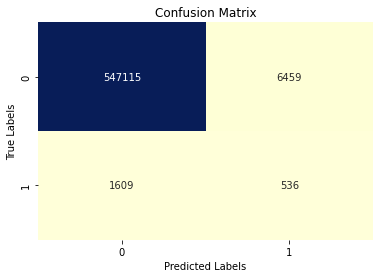

In [21]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

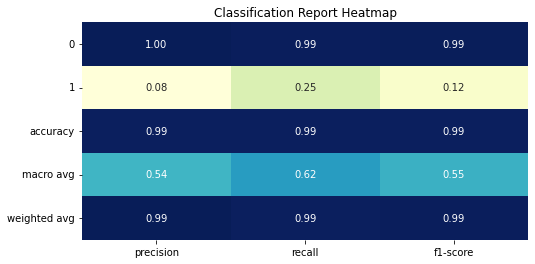

In [22]:
report = classification_report(y_test, prediction, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Remove the support column
report_df.drop("support", axis=1, inplace=True)

# Convert the classification report DataFrame to numeric values
report_df = report_df.apply(pd.to_numeric)

# Create a heatmap of the classification report
plt.figure(figsize=(8, 4))
sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt=".2f", cbar=False)
plt.title("Classification Report Heatmap")
plt.show()

In [26]:
#predicting with custom threshold. when we use predict(), it takes default threshold value and considers below threshold value as anomaly
#so, we use a score sample to set a customized thershold(need to tune it in order to have less false positives and less false negatives)
#tried 1%, 1.5%, 2%, 3% 
score = one_class_svm.score_samples(X_test_scaled)

score_threshold = np.percentile(score, 1.5)
print(f'The customized score threshold for 1.5% of outliers is {score_threshold:.2f}')

customized_prediction = [1 if i < score_threshold else 0 for i in score]
print(confusion_matrix(y_test, customized_prediction))
print(classification_report(y_test, customized_prediction))
print("F2_Score", fbeta_score(y_test, customized_prediction, beta=2))

The customized score threshold for 1.5% of outliers is 158.97
[[545830   7744]
 [  1553    592]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.07      0.28      0.11      2145

    accuracy                           0.98    555719
   macro avg       0.53      0.63      0.55    555719
weighted avg       0.99      0.98      0.99    555719

F2_Score 0.1749822653109482
